## Exploratory Data Analysis

Data sourced from: https://portal.edirepository.org/nis/mapbrowse?scope=edi&identifier=698&revision=3

Abstract of dataset: "The concentration of oxygen dissolved in water regulates many aspects of aquatic ecosystems, including habitat suitability for biota, greenhouse gas emissions, nutrient cycling, and metal toxicity. However, little is known about how dissolved oxygen (DO) concentrations in lakes are changing through time. The solubility of oxygen in water declines with increasing water temperatures, but other temperature-sensitive processes may suppress or amplify trends through time, making long-term observations essential to understanding DO dynamics and trends. This dataset includes measurements of dissolved oxygen and temperature from greater than 400 widely geographically-distributed lakes, as well as a suite of associated measurements in or around many of the lakes, including watershed land use, water clarity, limiting nutrient concentrations, and chlorophyll concentrations. Analysis of these data reveal widespread losses in dissolved oxygen through time in both surface and deep waters."

The dataset used has a number of very large files, it is a very comprehensive dataset covering a wide range of data points for over 400 lakes over the course of almost 80 years. With the direction of Dr. Jonathan Stetler and personal research, the datasets are trimmed to more relevant information for the scope of this project. The following is a list of the csv files used, the columns considered for selection from them and the reasoning behind this consideration.


**Secchi_Data.csv**
| Column                            | Purpose                                                |
| ----------------------------------|--------------------------------------------------------|
| lake_id                           | Used to match each lake between datasets.
| date                              | Used to show data over time.
| secchi                            | Maximum depth that a secci disk can be seen. This is a direct measurement of water clarity.

**Use_Data.csv**
| Column                            | Purpose                                                |
| ----------------------------------|--------------------------------------------------------|
| lake_id                           | Used to match each lake between datasets.
| perag                             | Percent of watershed that is agriculture
| perdev                            | Percent of watershed that is development
| perwater                          | Percent of watershed that is bodies of water, streams, creeks, etc.
| perfor                            | Percent of watershed that is forest 
| perwet                            | Percent of watershed that is wetlands
| pergrass                          | Percent of watershed that is grasslands
| pershrub                          | Percent of watershed that is shrublands

**Productivity_Data.csv**
| Column                            | Purpose                                                |
| ----------------------------------|--------------------------------------------------------|
| lake_id                           | Used to match each lake between datasets.
| date                              | Used to show data over time.
| depth                             | Depth the measurement was taken at
| chla_ugl                          | Disolved chlorofil in micrograms per liter, essentially measures plant life particularly algae
| doc_mgl                           | Disolved organic carbon in milligrams per liter. In general, this comes from decompistion of organic matter and as such can be used as a measurement of how much decompisition is happening.

Other measurements of dissolved material were taken but it was recommended to focus on just those two based on relevance and completeness of data. For example, fairly complete data was available for tp_ugl, total phosphorus disolved in the water in micrograms per liter. Since the idea behind this measurement is that phosphorus is vital for plant growth and development, it was discussed to be a "middle man" for plant growth as measured by disolved cholorfil, a more direct measurement. Edge cases could exist where, due to a lack of phosphorus, plant growth could not occur but this was considered an unlikely edge case and as such the column was ommited from analysis so as not to *muddy the waters.*

**Info_Data.csv**
| Column                            | Purpose                                                |
| ----------------------------------|--------------------------------------------------------|
| lake_id                           | Used to match each lake between datasets.
| lat                               | Latitude of the lake, since latitude effects temperature and higher temperatures mean reduced solubility of oxygen in water


**Hydrolakes_Data.csv**
| Column                            | Purpose                                                |
| ----------------------------------|--------------------------------------------------------|
| lake_id                           | Used to match each lake between datasets.
| area_km2                          | Surface area of the lake, general lake data may be useful and this is relevant to the volume of the lake which should help determine how many nutrients it can handle. Aditionally, this provides a capacity for surface residing plants.
| mean_depth_m                      | Mean depth of the lake in meters, general lake data may be useful and this is relevant to the volume of the lake which should help determine how many nutrients it can handle.
| res_time_days                     | Residence time in days, how long water spends in the lake, when this is lower nutrients should get filtered out quicker.
| elevation_m                       | Elevation in meters. Since higher altitudes have thinner atomosphere, this could help predict how much oxygen is able to enter the lake.
| wshd_area_km2                     | Watershed area in square kilometers, with a small watershed to lake area ration, the composition of the watershed should matter less.



Note: Each dataset also has a "name" column to match the lake_id to the actual name of the lake. This is omitted above since it is only relevant for beautification of graphs and can be grabbed from any dataset.

In [127]:
# Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress

In [82]:
# Import the data

Secchi_df = pd.read_csv('Secchi_Data.csv')
Use_df = pd.read_csv('Use_Data.csv')
Productivity_df = pd.read_csv('Productivity_Data.csv')
Info_df = pd.read_csv('Info_Data.csv')
Hydrolakes_df = pd.read_csv('Hydrolakes_Data.csv')

C:\conda_tmp\ipykernel_7104\2568769356.py:5: DtypeWarning: Columns (5,8,10,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  Productivity_df = pd.read_csv('Productivity_Data.csv')


In [83]:
# Viewing the first few rows of the data for Secchi_df
Secchi_df.head()

,row_id,lake_id,name,date,secchi,meas_location,sec_flag,year
0,1,1,Washington,1993-01-04,6.6,852,NaN,1993
1,2,1,Washington,1993-04-05,3.0,852,NaN,1993
2,3,1,Washington,1993-05-03,4.0,852,NaN,1993
3,4,1,Washington,1993-06-07,7.0,852,NaN,1993
4,5,1,Washington,1993-07-06,3.2,852,NaN,1993


In [84]:
# Dropping the columns we don't care about
Secchi_df = Secchi_df.drop(columns=['row_id', 'name', 'meas_location', 'sec_flag', 'year'])

In [85]:
# Viewing the first few rows of the data for Use_df
Use_df.head()

,row_id,lake_id,name,perag,perdev,perwater,perfor,perwet,pergrass,pershrub,comment
0,1,1,Washington,0.84,48.97,2.20,41.23,2.00,0.76,3.76,NaN
1,2,2,Sammamish,1.56,37.11,0.44,54.35,1.92,1.21,2.68,NaN
2,3,7,Neversink Reservoir,0.78,0.53,0.00,93.44,0.56,0.17,0.27,NaN
3,4,8,Cannonsville Reservoir,16.23,1.74,0.07,64.00,0.64,1.34,1.03,NaN
4,5,15,Kezar Lake - Upper Bay,0.70,2.40,1.61,89.48,4.38,0.30,1.12,NaN


In [86]:
# Dropping the columns we don't care about
Use_df = Use_df.drop(columns=['row_id', 'name', 'comment'])

In [87]:
# Viewing the first few rows of the data for Productivity_df
Productivity_df.head()

,row_id,lake_id,name,date,depth,stratum,meas_location,tp_ugl,tp_flag,tn_ugl,tn_flag,doc_mgl,doc_flag,chla_ugl,chla_flag,comment,year
0,1,1,Washington,1993-01-04,1.0,NaN,852,22.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
1,2,1,Washington,1993-01-04,10.0,NaN,852,20.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
2,3,1,Washington,1993-01-04,40.0,NaN,852,21.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
3,4,1,Washington,1993-01-04,60.0,NaN,852,24.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
4,5,1,Washington,1993-02-01,1.0,NaN,852,26.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993


In [88]:
# Dropping the columns we don't care about
Productivity_df = Productivity_df.drop(columns=['row_id', 'name', 'stratum', 'meas_location', 'tp_ugl', 'tp_flag', 'tn_ugl', 'tn_flag', 'doc_flag', 'chla_flag', 'comment', 'year'])

In [89]:
# Viewing the first few rows of the data for Info_df
Info_df.head()

,row_id,lake_id,name,country,state_prov,lat,long,max_depth,surf_area,type,troph_status
0,1,1,Washington,USA,Washington,47.6215,-122.2558,65.00,8760.0,Monomictic,NaN
1,2,2,Sammamish,USA,Washington,47.6085,-122.0878,32.00,1980.0,Monomictic,NaN
2,3,3,Mueggelsee,Germany,Berlin,52.4380,13.6500,8.00,730.0,Polymictic,NaN
3,4,4,Erken,Sweden,Stockholm,59.8403,18.6258,20.65,24.2,dimictic,NaN
4,5,5,Rimov Reservoir,Czech Republick,South Bohemian Region,48.8489,14.4912,42.00,180.0,Reservoir,NaN


In [90]:
# Dropping the columns we don't care about
Info_df = Info_df.drop(columns=['row_id', 'name', 'country', 'state_prov', 'long', 'max_depth', 'surf_area', 'type', 'troph_status'])

In [91]:
# Viewing the first few rows of the data for Hydrolakes_df
Hydrolakes_df.head()

,row_id,lake_id,name,hylak_id,area_km2,mean_depth_m,shore_len_km,dis_avg_ms3,res_time_days,elevation_m,wshd_area_km2
0,1,1,Washington,8478,83.77,34.0,110.12,54.017,611.1,1,1488.1
1,2,2,Sammamish,8476,18.74,25.2,29.40,8.930,611.5,5,232.8
2,3,3,Mueggelsee,165102,6.98,6.9,10.66,33.169,16.7,30,7611.3
3,4,4,Erken,12809,23.14,7.2,46.53,1.020,1897.5,15,138.7
4,5,5,Rimov Reservoir,167991,1.32,25.4,14.27,3.664,106.1,471,482.0


In [92]:
# Dropping the columns we don't care about
Hydrolakes_df = Hydrolakes_df.drop(columns=['row_id', 'name', 'hylak_id', 'shore_len_km', 'dis_avg_ms3'])

In [93]:
# Make a single dataframe

df = Secchi_df.merge(Use_df, on='lake_id', how='outer') \
              .merge(Productivity_df, on=['lake_id', 'date'], how='outer') \
              .merge(Info_df, on=['lake_id'], how='outer') \
              .merge(Hydrolakes_df, on=['lake_id'], how='outer') \

df.head()

,lake_id,date,secchi,perag,perdev,perwater,perfor,perwet,pergrass,pershrub,depth,doc_mgl,chla_ugl,lat,area_km2,mean_depth_m,res_time_days,elevation_m,wshd_area_km2
0,1,1993-01-04,6.6,0.84,48.97,2.2,41.23,2.0,0.76,3.76,1.0,NaN,NaN,47.6215,83.77,34.0,611.1,1.0,1488.1
1,1,1993-01-04,6.6,0.84,48.97,2.2,41.23,2.0,0.76,3.76,10.0,NaN,NaN,47.6215,83.77,34.0,611.1,1.0,1488.1
2,1,1993-01-04,6.6,0.84,48.97,2.2,41.23,2.0,0.76,3.76,40.0,NaN,NaN,47.6215,83.77,34.0,611.1,1.0,1488.1
3,1,1993-01-04,6.6,0.84,48.97,2.2,41.23,2.0,0.76,3.76,60.0,NaN,NaN,47.6215,83.77,34.0,611.1,1.0,1488.1
4,1,1993-04-05,3.0,0.84,48.97,2.2,41.23,2.0,0.76,3.76,1.0,NaN,NaN,47.6215,83.77,34.0,611.1,1.0,1488.1


In [94]:
# Checking how many nulls we have
df.isna().sum()

lake_id               0
date                 26
secchi            20361
perag             67032
perdev            67032
perwater          67032
perfor            67032
perwet            67032
pergrass          67032
pershrub          67032
depth             88415
doc_mgl          221105
chla_ugl         161527
lat                   0
area_km2          17396
mean_depth_m      17396
res_time_days     17396
elevation_m       17396
wshd_area_km2     17396
dtype: int64

In [95]:
# Secchi is the cause of some na
Secchi_df.isna().sum()

lake_id       0
date          0
secchi     1452
dtype: int64

In [96]:
# Productivity is the cause of some na
Productivity_df.isna().sum()

lake_id          0
date             0
depth        23316
doc_mgl     151257
chla_ugl     94883
dtype: int64

In [97]:
# Hydrolakes is not the cause of any na
# So every lake that has data has all of it's data
# Some lakes do not have corresponding measurements
Hydrolakes_df.isna().sum()

lake_id          0
area_km2         0
mean_depth_m     0
res_time_days    0
elevation_m      0
wshd_area_km2    0
dtype: int64

To make a prediction model, we want a dataset with no null rows for secchi since that's what we're predicting. We also want all the information on the makeup of the watershed area since that's ideally our core predictor. Dropping rows where depth is null makes sense since it informs the significance of the nutrient measurement. Nutrient measurement was not taken for every day and the missing data is significant enough that there is no good way to infer it so this must also be dropped. 

If a time series analysis is to be made to predict the trends of various lakes, the nutrient column should not be dropped since it loses us some days entirely. Instead, each nutrient value that is missing should be replaced with the previous measurement taken at the same depth. That way only the first few days will be lost since they do not have nutrient data,

In [115]:
# Cleaning the dataset

df_cleaned = df.dropna(subset=['secchi', 'perag', 'depth', 'area_km2', 'doc_mgl', 'chla_ugl'])

df_cleaned.isna().sum()

lake_id          0
date             0
secchi           0
perag            0
perdev           0
perwater         0
perfor           0
perwet           0
pergrass         0
pershrub         0
depth            0
doc_mgl          0
chla_ugl         0
lat              0
area_km2         0
mean_depth_m     0
res_time_days    0
elevation_m      0
wshd_area_km2    0
dtype: int64

In [99]:
df_cleaned.shape

(7377, 19)

In [117]:
df_cleaned.head()

,lake_id,date,secchi,perag,perdev,perwater,perfor,perwet,pergrass,pershrub,depth,doc_mgl,chla_ugl,lat,area_km2,mean_depth_m,res_time_days,elevation_m,wshd_area_km2
2325,1,2002-03-04,3.8,0.84,48.97,2.2,41.23,2.0,0.76,3.76,0.8,2.8,4.5,47.6215,83.77,34.0,611.1,1.0,1488.1
2330,1,2002-03-04,3.8,0.84,48.97,2.2,41.23,2.0,0.76,3.76,59.4,2.9,2.8,47.6215,83.77,34.0,611.1,1.0,1488.1
2332,1,2002-03-04,3.8,0.84,48.97,2.2,41.23,2.0,0.76,3.76,0.8,2.8,4.5,47.6215,83.77,34.0,611.1,1.0,1488.1
2337,1,2002-03-04,3.8,0.84,48.97,2.2,41.23,2.0,0.76,3.76,59.4,2.9,2.8,47.6215,83.77,34.0,611.1,1.0,1488.1
2341,1,2002-04-01,4.3,0.84,48.97,2.2,41.23,2.0,0.76,3.76,1.0,3.0,16.1,47.6215,83.77,34.0,611.1,1.0,1488.1


In [122]:
# Make plots more readable by getting average value per lake
df_avg = df_cleaned.drop(columns='date').groupby('lake_id').mean().reset_index()

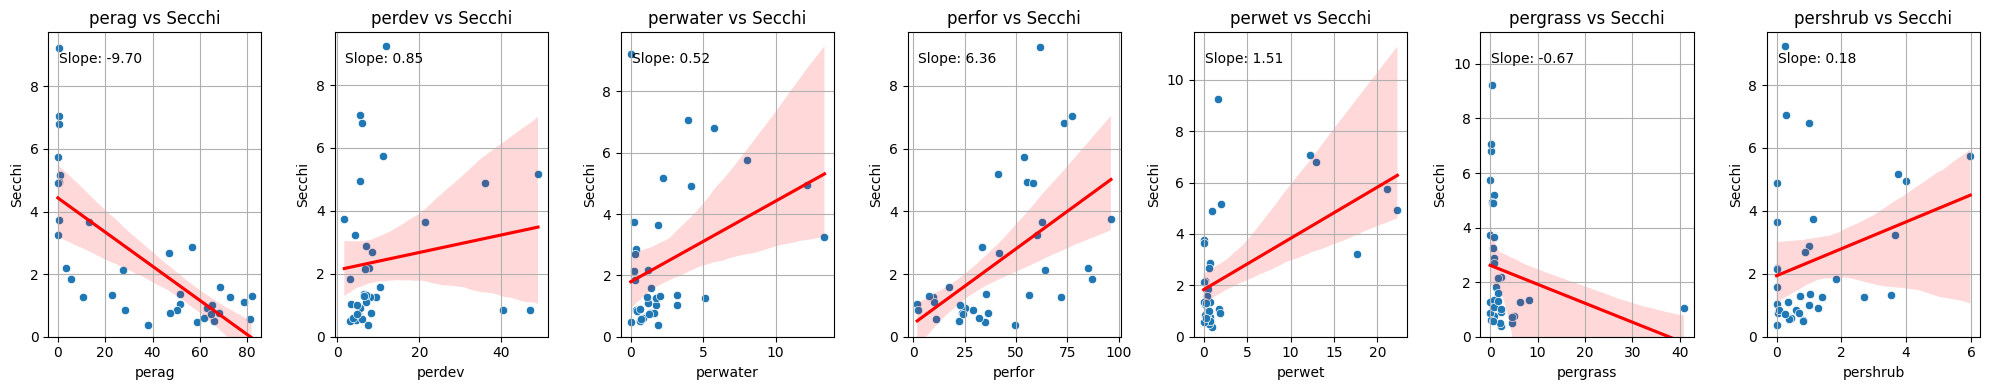

In [133]:

# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 7, figsize=(20, 4))

# Loop through each column plotting
columns_to_plot = ['perag', 'perdev', 'perwater', 'perfor', 'perwet', 'pergrass', 'pershrub']
for i, column in enumerate(columns_to_plot):
    sns.scatterplot(data=df_avg, y='secchi', x=column, ax=axes[i])
    sns.regplot(data=df_avg, x=column, y='secchi', ax=axes[i], scatter=False, line_kws={'color': 'red'})
    axes[i].set_ylabel('Secchi')
    axes[i].set_xlabel(column)
    axes[i].set_title(f'{column} vs Secchi')
    axes[i].grid(True)
    axes[i].set_ylim(bottom=0)

    # Calculate the slope of the best fit line
    slope, intercept, _, _, _ = linregress(df_avg['secchi'], df_avg[column])
    
    # Annotate the plot with the slope value
    axes[i].annotate(f'Slope: {slope:.2f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=10, color='black')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

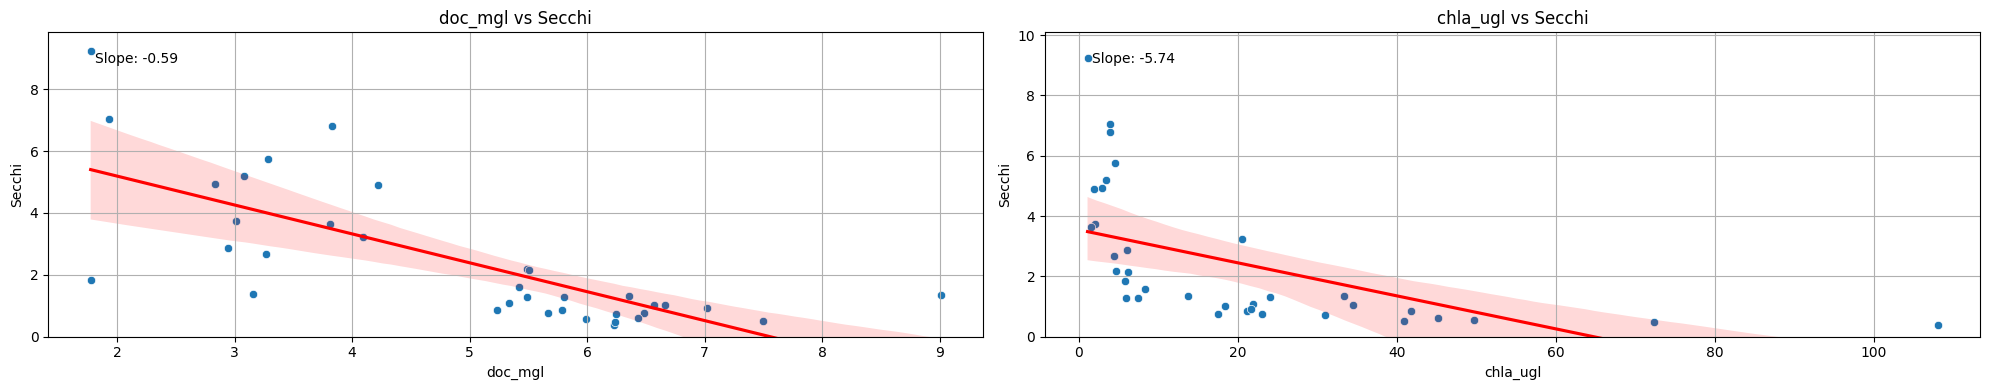

In [134]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 4))

# Loop through each column for plotting
columns_to_plot = ['doc_mgl', 'chla_ugl']
for i, column in enumerate(columns_to_plot):
    sns.scatterplot(data=df_avg, y='secchi', x=column, ax=axes[i])
    sns.regplot(data=df_avg, y='secchi', x=column, ax=axes[i], scatter=False, line_kws={'color': 'red'})
    axes[i].set_ylabel('Secchi')
    axes[i].set_xlabel(column)
    axes[i].set_title(f'{column} vs Secchi')
    axes[i].grid(True)
    axes[i].set_ylim(bottom=0)

    # Calculate the slope of the best fit line
    slope, intercept, _, _, _ = linregress(df_avg['secchi'], df_avg[column])
    
    # Annotate the plot with the slope value
    axes[i].annotate(f'Slope: {slope:.2f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=10, color='black')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

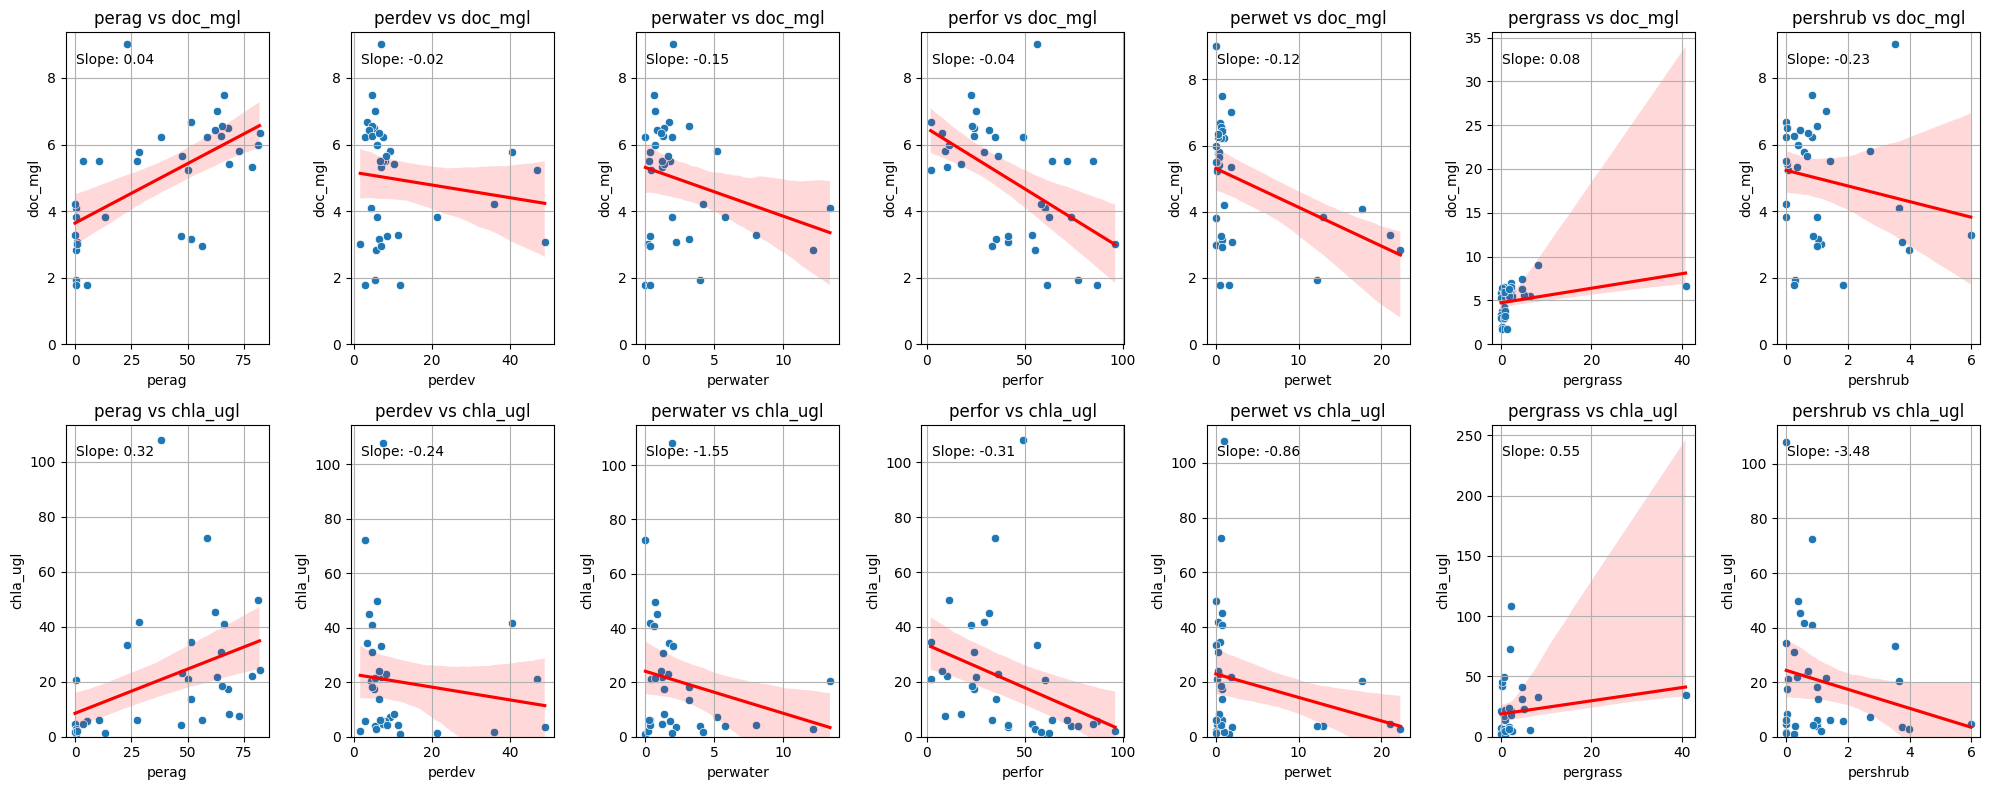

In [137]:

# Create a figure and axes for subplots
fig, axes = plt.subplots(2, 7, figsize=(20, 8))

# Loop through each column and row for plotting
rows_to_plot = ['doc_mgl', 'chla_ugl']
columns_to_plot = ['perag', 'perdev', 'perwater', 'perfor', 'perwet', 'pergrass', 'pershrub']
for j, row in enumerate(rows_to_plot):
    for i, column in enumerate(columns_to_plot):
        sns.scatterplot(data=df_avg, y=row, x=column, ax=axes[j][i])
        sns.regplot(data=df_avg, x=column, y=row, ax=axes[j][i], scatter=False, line_kws={'color': 'red'})
        axes[j][i].set_ylabel(row)
        axes[j][i].set_xlabel(column)
        axes[j][i].set_title(f'{column} vs {row}')
        axes[j][i].grid(True)
        axes[j][i].set_ylim(bottom=0)

        # Calculate the slope of the best fit line
        slope, intercept, _, _, _ = linregress(df_avg[column], df_avg[row])

        # Annotate the plot with the slope value
        axes[j][i].annotate(f'Slope: {slope:.2f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=10, color='black')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


The last three sets of graphs illustrate correlation between the percentage of various types of watershed enviornments, the nutrients disolved in the water and the secchi values. Causation can easily be infered from this correlation, the type of land influences how many nutrients flow into the lake, more nutrients both directly and indirectly decrease secchi value. As expected, agricultural land is the biggest offender due to fertilizer use.

Are there potentially factors outside of our control that influence the europhication of the lakes? If there are hugely influential factors outside of our control, that would mean there is a reduced ability for human intervention to solve this issue. Though, if you think about it, if non human factors are the primary reason behind the eutrophication of lakes, it may be less of an issue than initially framed. It isn't high nutrient level but high nutrient level where they shouldn't be that damages ecosystems.

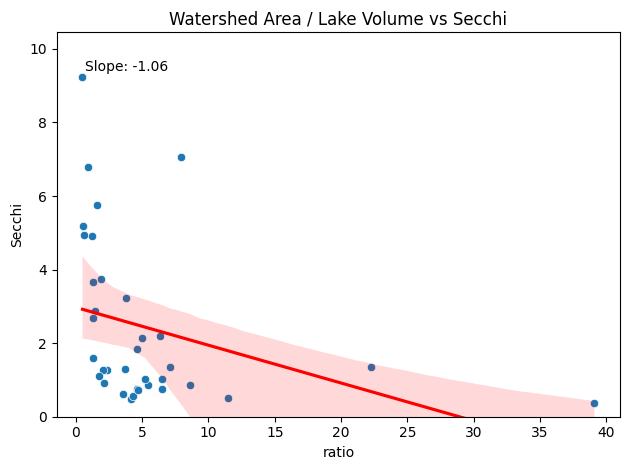

In [145]:
# We want to examine the ratio of approximate volume of the lake vs watershed area 
df_avg['ratio'] = df_avg['wshd_area_km2'] / (df_avg['area_km2'] * df_avg['mean_depth_m'])


sns.scatterplot(data=df_avg, y='secchi', x='ratio')
sns.regplot(data=df_avg, x='ratio', y='secchi', scatter=False, line_kws={'color': 'red'})
plt.ylabel('Secchi')
plt.xlabel('ratio')
plt.title(f'Watershed Area / Lake Volume vs Secchi')
#plt.plgrid(True)
plt.ylim(bottom=0)

# Calculate the slope of the best fit line
slope, intercept, _, _, _ = linregress(df_avg['secchi'], df_avg['ratio'])
    
# Annotate the plot with the slope value
plt.annotate(f'Slope: {slope:.2f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=10, color='black')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

It appears there is a correlation but is it extreme as the one between argicultural land percentage and secchi value? This is hard to tell without scaling the slope. Since the Y-axis in both cases is secchi, we only have to worry about the X-axis.




In [193]:
watershedVol_slope = -1.06
perag_slope = -9.70

ratMin = df_avg['ratio'].min()
ratMax = df_avg['ratio'].max()

peragMin = df_avg['perag'].min()
peragMax = df_avg['perag'].max()


scale = (peragMax-peragMin)/(ratMax - ratMin)


print("The scaled slope for ratio vs secchi is", round(watershedVol_slope * scale, 2))
print("Human agricultural effects are {:.2f} times more important than natural volume vs watershed ratios.".format(perag_slope/(watershedVol_slope * scale)))

The scaled slope for ratio vs secchi is -2.25
Human agricultural effects are 4.31 times more important than natural volume vs watershed ratios.


This is a good sign for human preventative measures or a bad sign for the importance of humans messing things up depending on how you look at it.

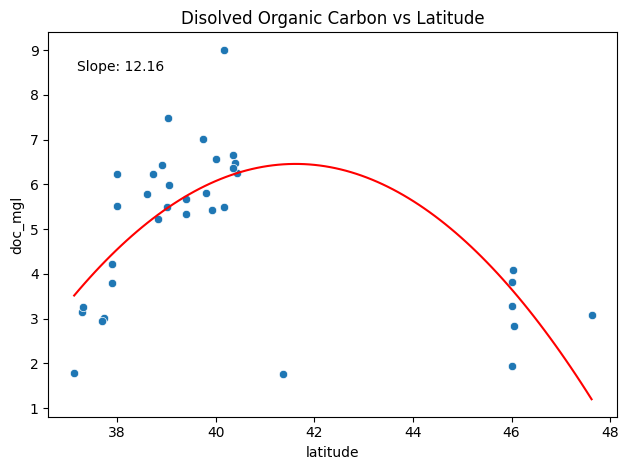

In [147]:
# Scatter plot with seaborn
sns.scatterplot(data=df_avg, y='doc_mgl', x='lat')

# Fit a second-degree polynomial curve
coefficients = np.polyfit(df_avg['lat'], df_avg['doc_mgl'], 2)
curve = np.poly1d(coefficients)

# Generate x values for the curve fit
x_values = np.linspace(df_avg['lat'].min(), df_avg['lat'].max(), 100)

# Plot the curve
plt.plot(x_values, curve(x_values), color='red', label='Curve Fit')

# Labeling and title
plt.ylabel('doc_mgl')
plt.xlabel('latitude')
plt.title('Disolved Organic Carbon vs Latitude')

# Annotate the plot with the slope value
plt.annotate(f'Slope: {coefficients[1]:.2f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=10, color='black')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [164]:
lat_min = df_avg['lat'].min()
lat_max = df_avg['lat'].max()

print("For df_avg, minimum value of 'lat':", lat_min)
print("For df_avg, maximum value of 'lat':", lat_max)

lat_min = df['lat'].min()
lat_max = df['lat'].max()

print("For df, minimum value of 'lat':", lat_min)
print("For df, maximum value of 'lat':", lat_max)


min_lat_row = df[df['lat'] == df['lat'].min()]

# Print the value of 'doc_mgl' for the minimum value of 'lat'
print("Value of 'doc_mgl' for the minimum value of 'lat':", min_lat_row['doc_mgl'].values[0])

For df_avg, minimum value of 'lat': 37.1339
For df_avg, maximum value of 'lat': 47.6215
For df, minimum value of 'lat': -42.6175
For df, maximum value of 'lat': 68.2962
Value of 'doc_mgl' for the minimum value of 'lat': nan


WHOOPS! Looks like the data doesn't have doc_mgl values for any lakes below about 35 degrees North so we lost some information trimming our data. The idea was to check whether latitude affects oxygenation since higher latitudes will be colder and therefore increase the ability for oxygen to disolve in water which should affect the disolved organic carbon. This was a silly idea anyway though since higher temperatures also increase oxygen production. We can safely drop the latitude column for a simpler model.

In [166]:
df_avg = df_avg.drop(columns='lat')

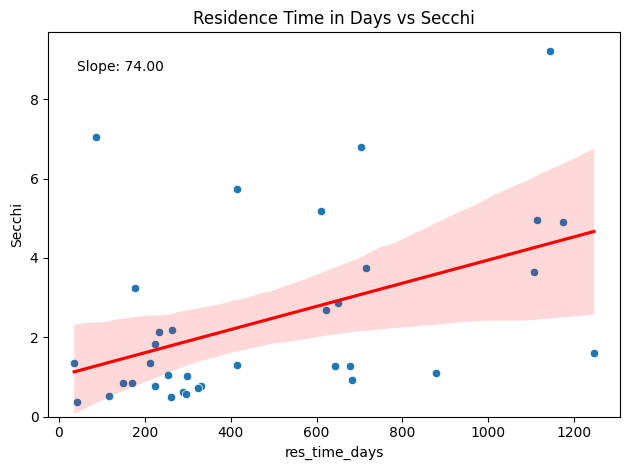

In [167]:
sns.scatterplot(data=df_avg, y='secchi', x='res_time_days')
sns.regplot(data=df_avg, x='res_time_days', y='secchi', scatter=False, line_kws={'color': 'red'})
plt.ylabel('Secchi')
plt.xlabel('res_time_days')
plt.title(f'Residence Time in Days vs Secchi')
#plt.plgrid(True)
plt.ylim(bottom=0)

# Calculate the slope of the best fit line
slope, intercept, _, _, _ = linregress(df_avg['secchi'], df_avg['res_time_days'])
    
# Annotate the plot with the slope value
plt.annotate(f'Slope: {slope:.2f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=10, color='black')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [194]:
resTime_slope = 74
perag_slope = -9.70

resMin = df_avg['res_time_days'].min()
resMax = df_avg['res_time_days'].max()

peragMin = df_avg['perag'].min()
peragMax = df_avg['perag'].max()


scale = (peragMax-peragMin)/(resMax - resMin)


print("The scaled slope for residence time vs secchi is", round(resTime_slope * scale, 2))
print("Human agricultural effects are {:.2f} times more important than residence time.".format(abs(perag_slope/(resTime_slope * scale))))

The scaled slope for residence time vs secchi is 5.0
Human agricultural effects are 1.94 times more important than residence time.


Okay so, we have a general understanding that aspects that we cannot control such as watershed area to lake volume ratio and the residence time of the lake do greatly affect the lake's turbidity but not to the degree that human activity through agriculture does. Essentially we can consider these factors as establishing a "carrying capacity" for how much human activity the lake can handle. This exploration of the data is enough to conclude that a model would be useful for predicting how a lake would be affected by human change of the watershed area.


I also want to check the general trendline for disolved organic carbon across all lakes to illustrate the conclusion of the initial data collectors. Take note that this is only one factor in measuring disolved oxygen, but it gently informs a decision made later.

In [ ]:
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

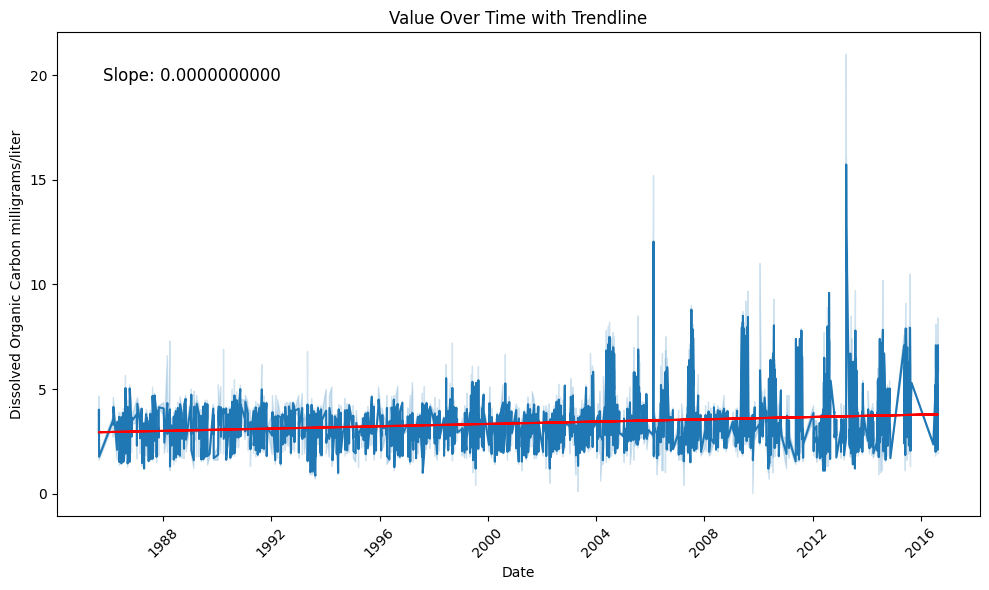

Slope =  8.772988824145606e-19


In [192]:
# Plotting without trendline
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='doc_mgl', data=df_cleaned)

# Calculate and plot trendline
x = pd.to_numeric(df_cleaned['date'])
y = df_cleaned['doc_mgl']
slope, intercept, _, _, _ = linregress(x, y)
plt.plot(df_cleaned['date'], slope * x + intercept, color='red')

# Annotate slope
plt.annotate(f'Slope: {slope:.10f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='black')

plt.title('Value Over Time with Trendline')
plt.xlabel('Date')
plt.ylabel('Dissolved Organic Carbon milligrams/liter')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

print("Slope = ", slope)


If you're curious what individual lakes look like I have included it here:

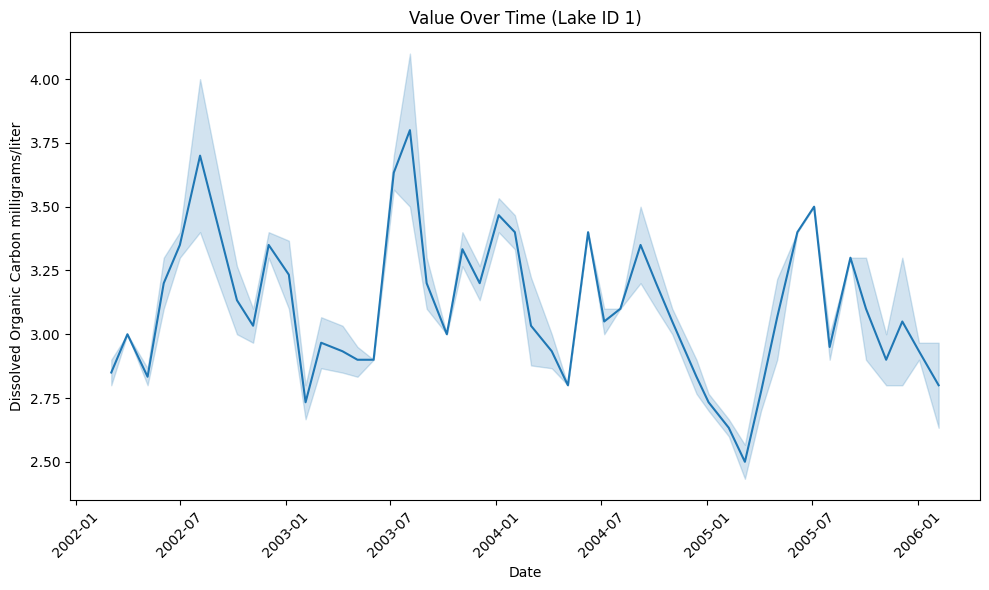

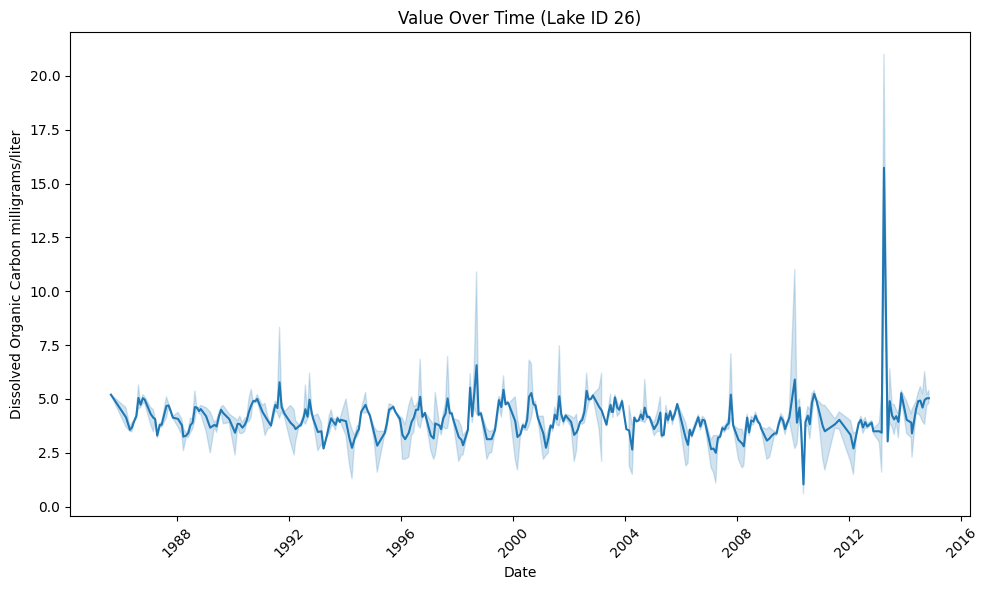

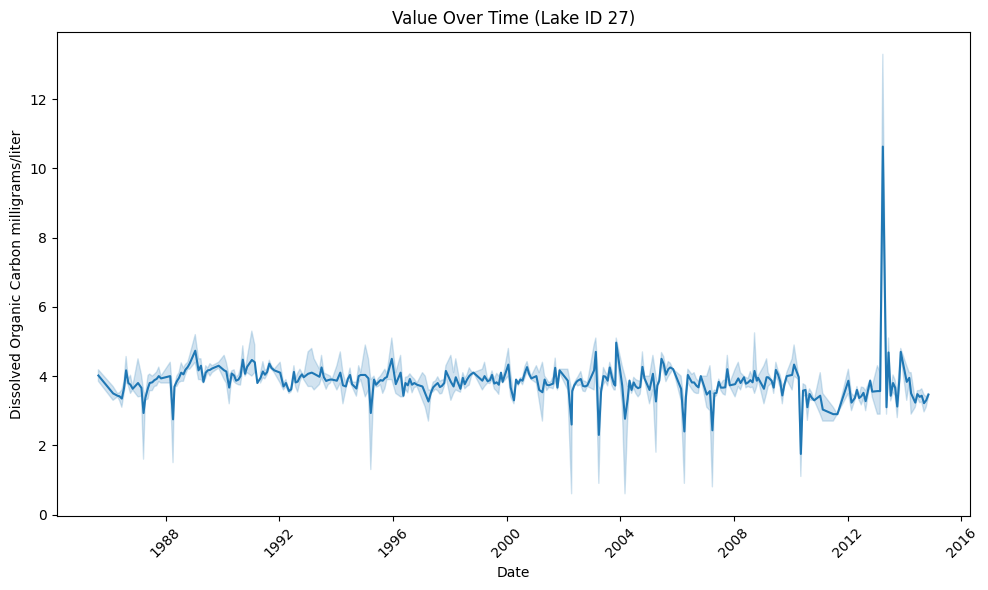

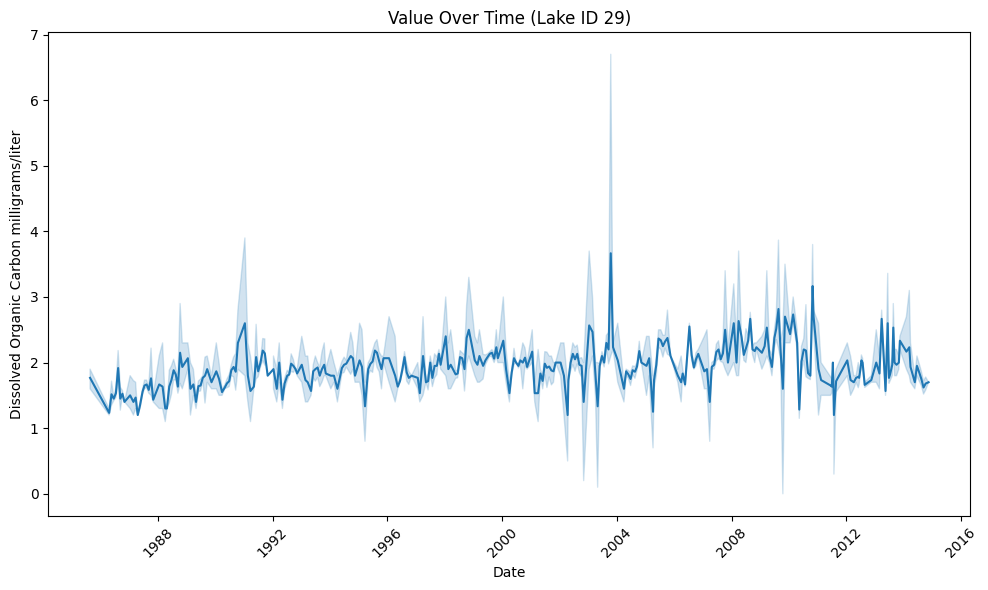

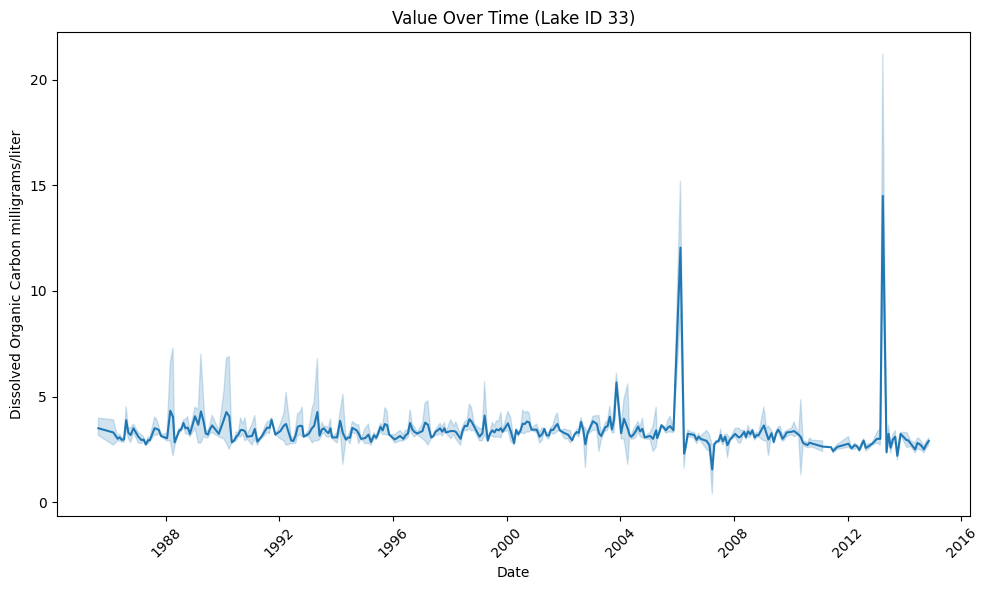

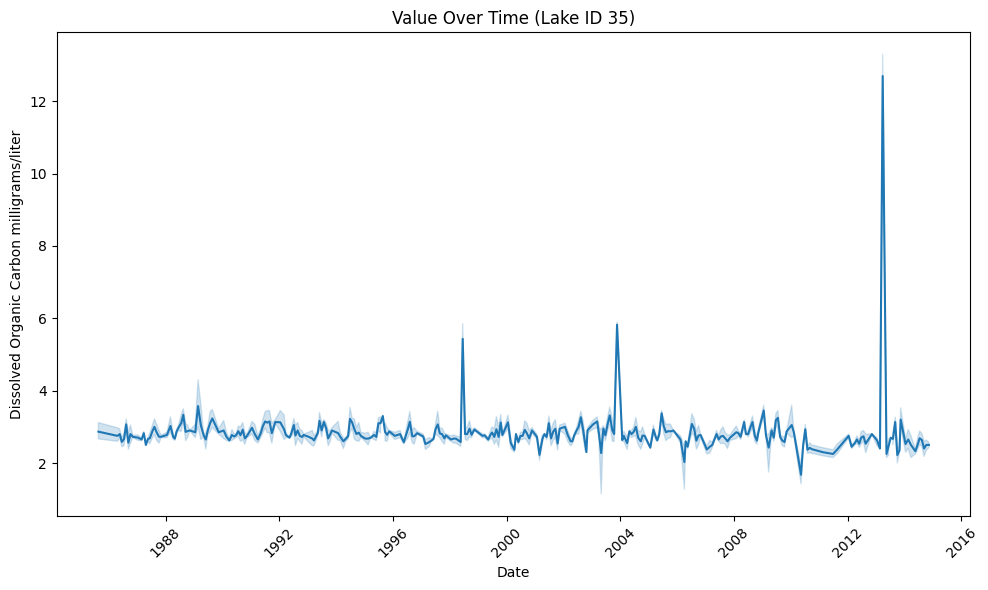

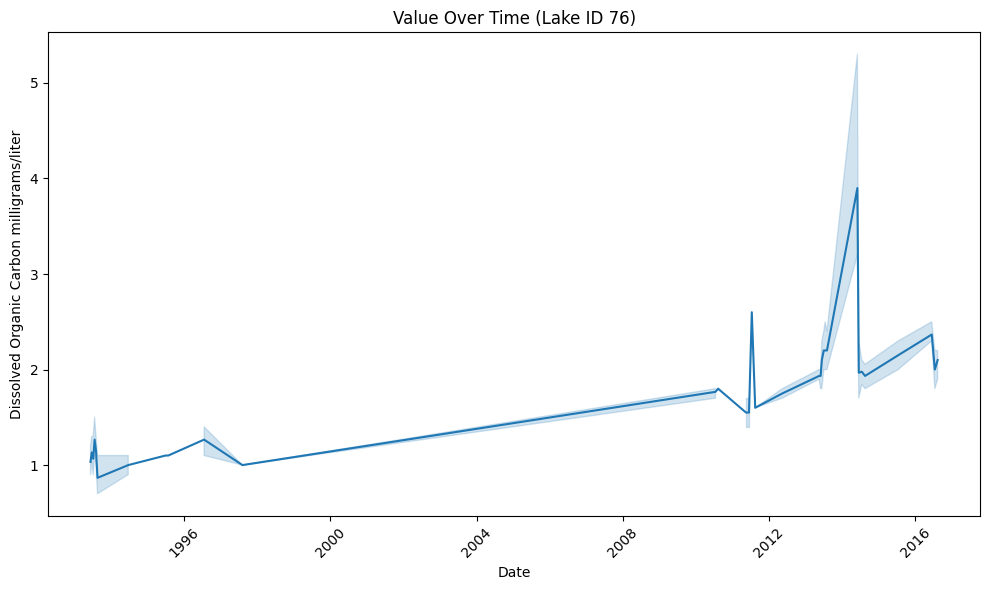

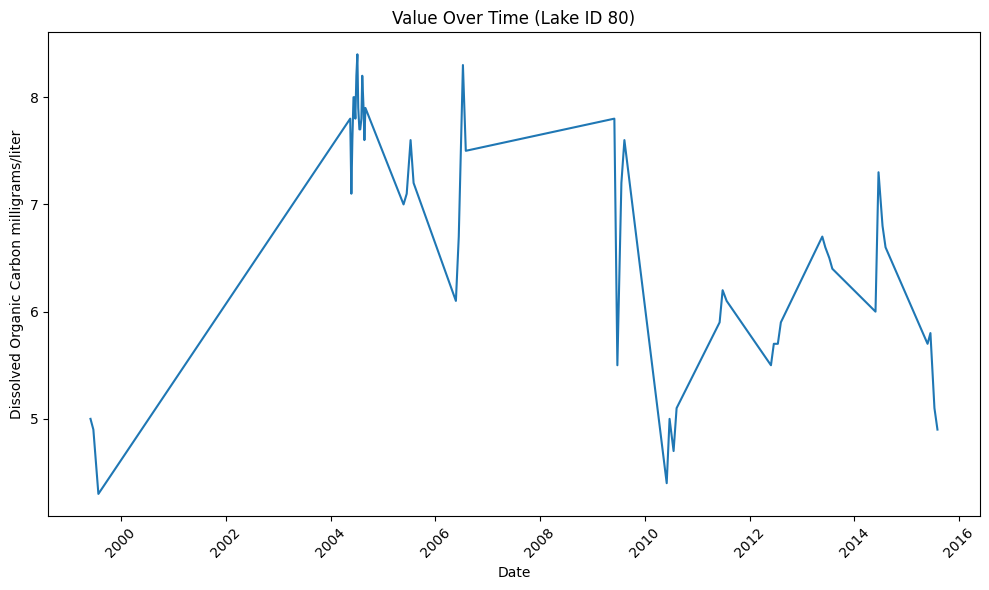

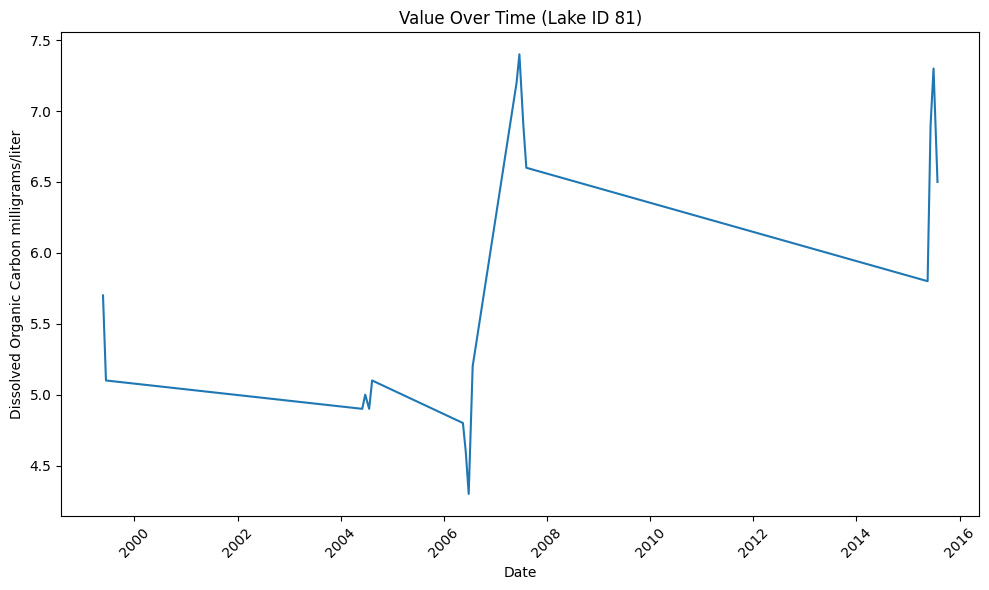

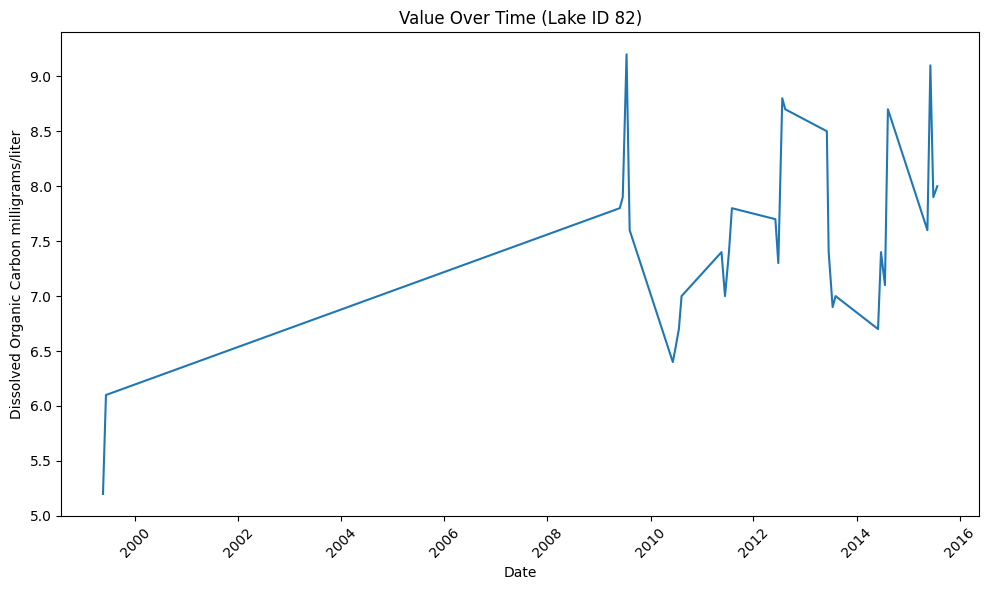

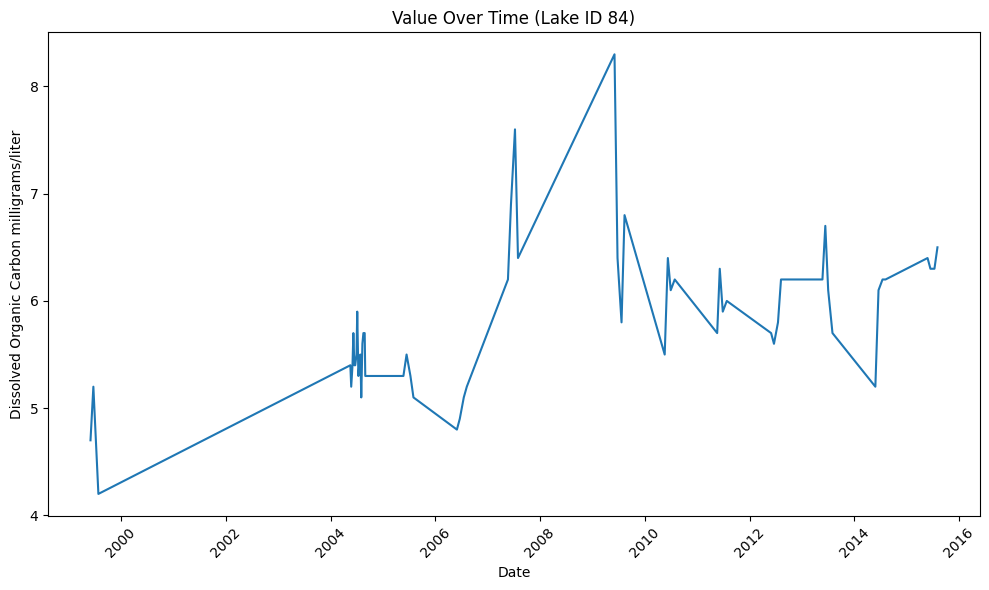

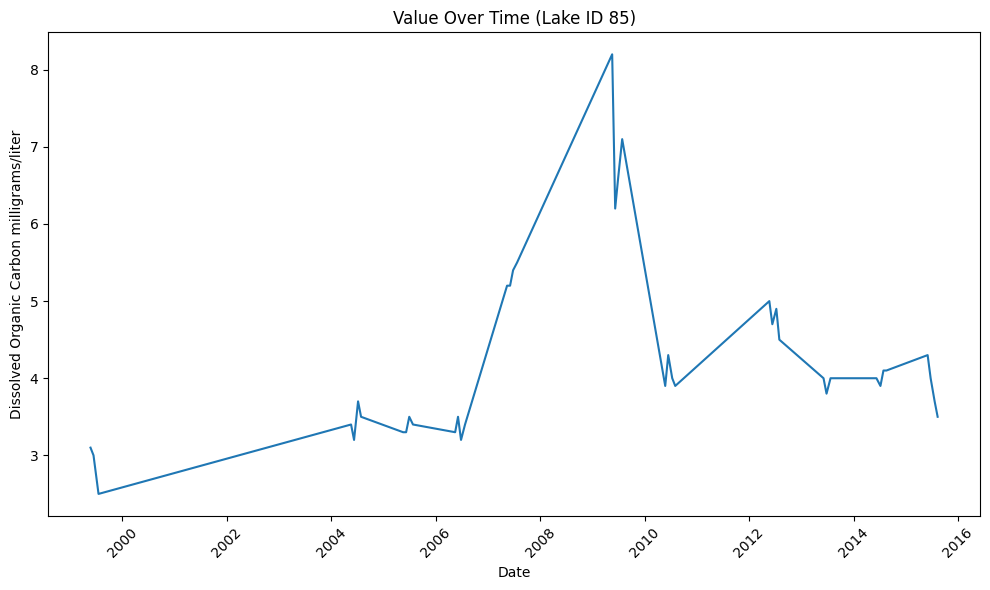

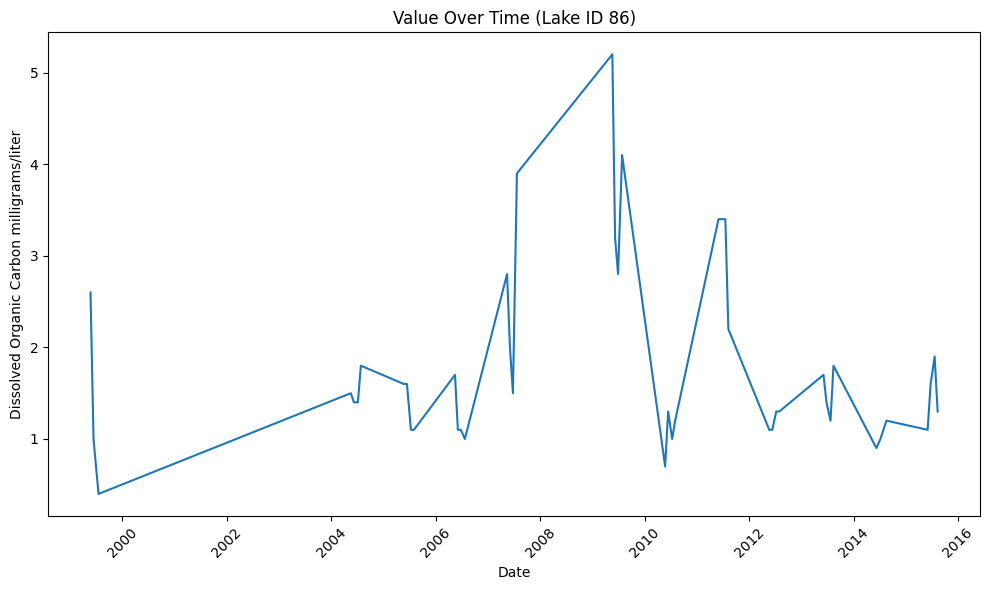

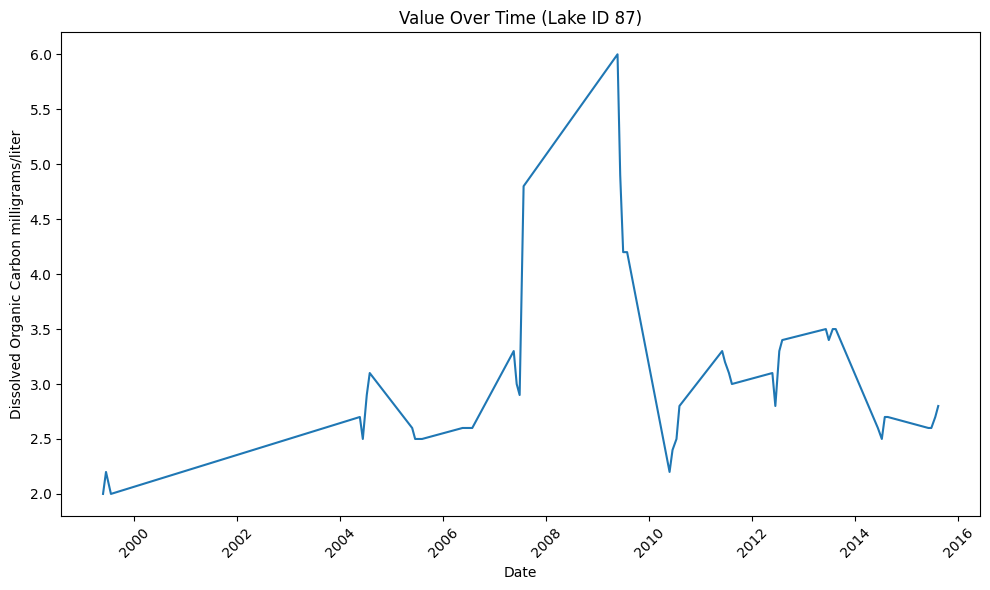

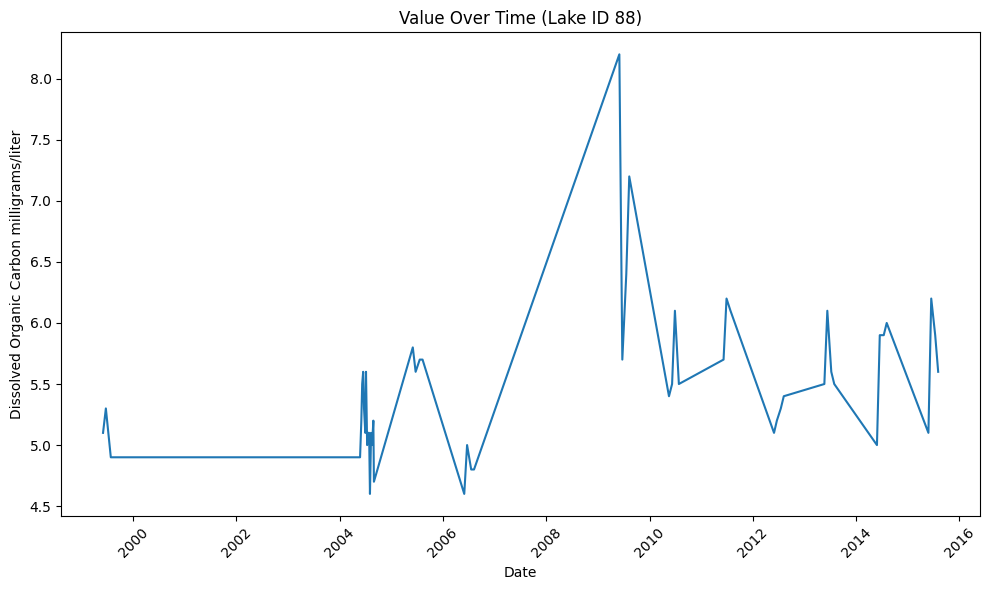

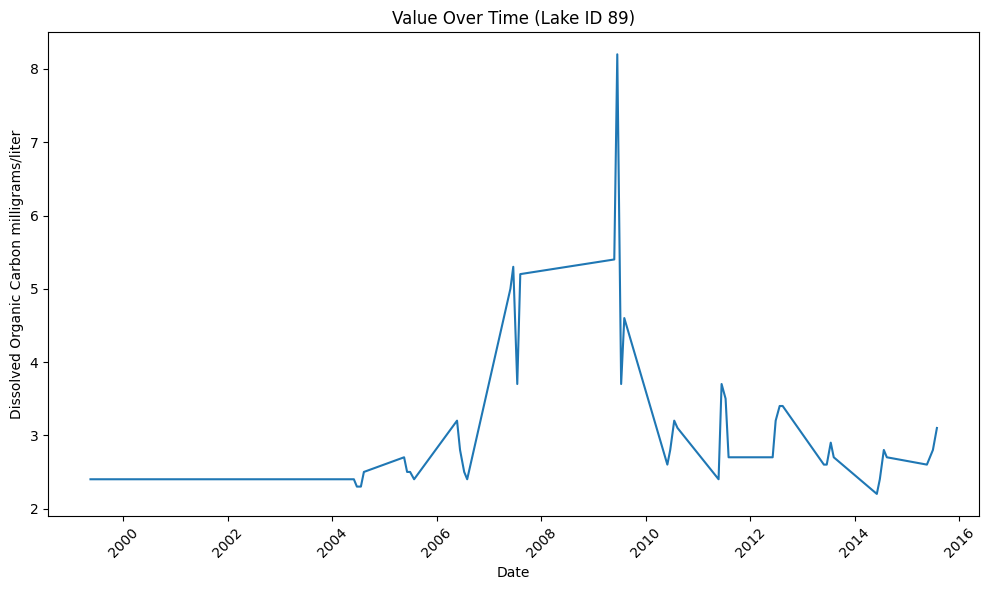

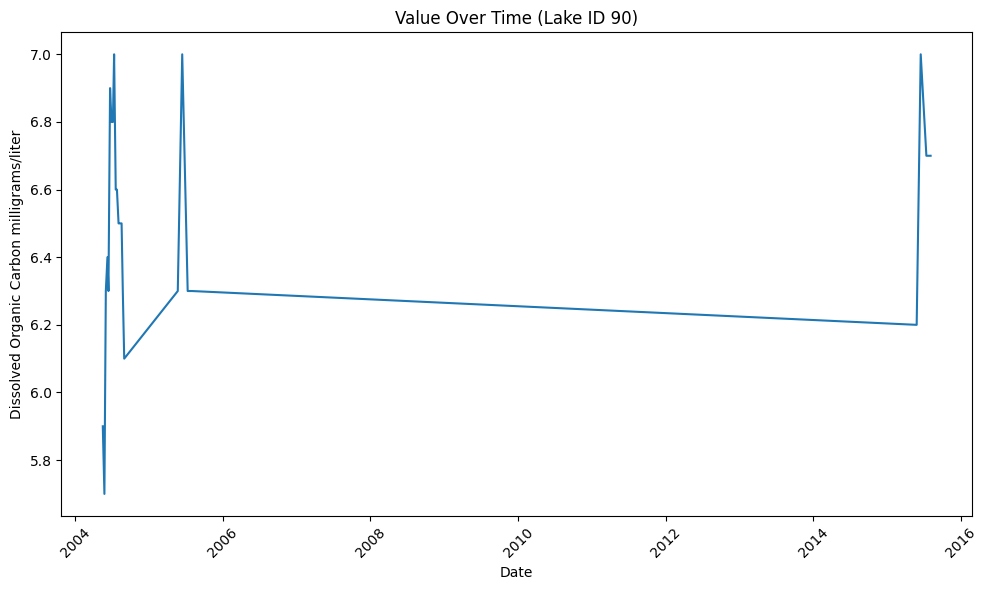

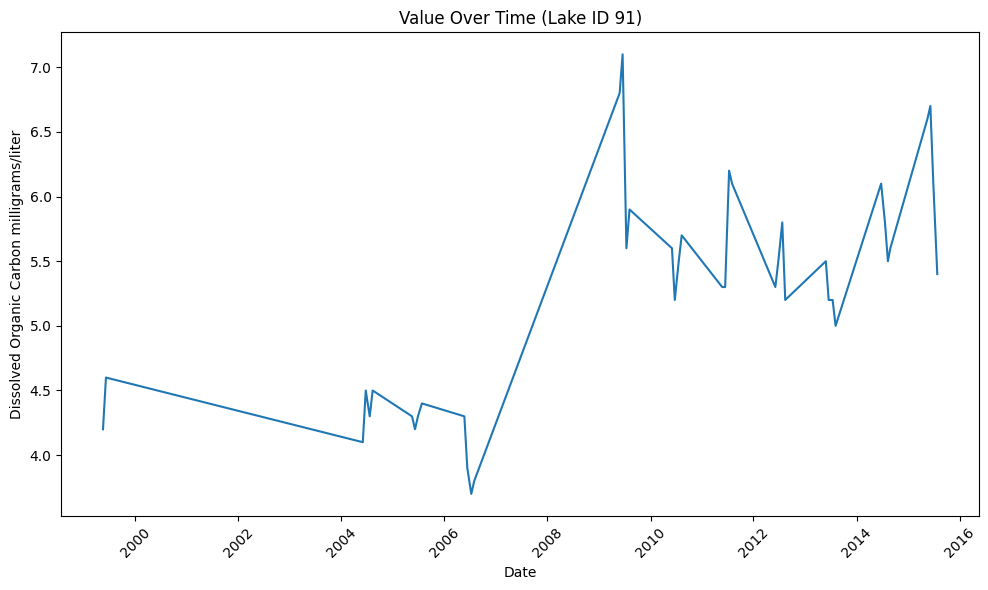

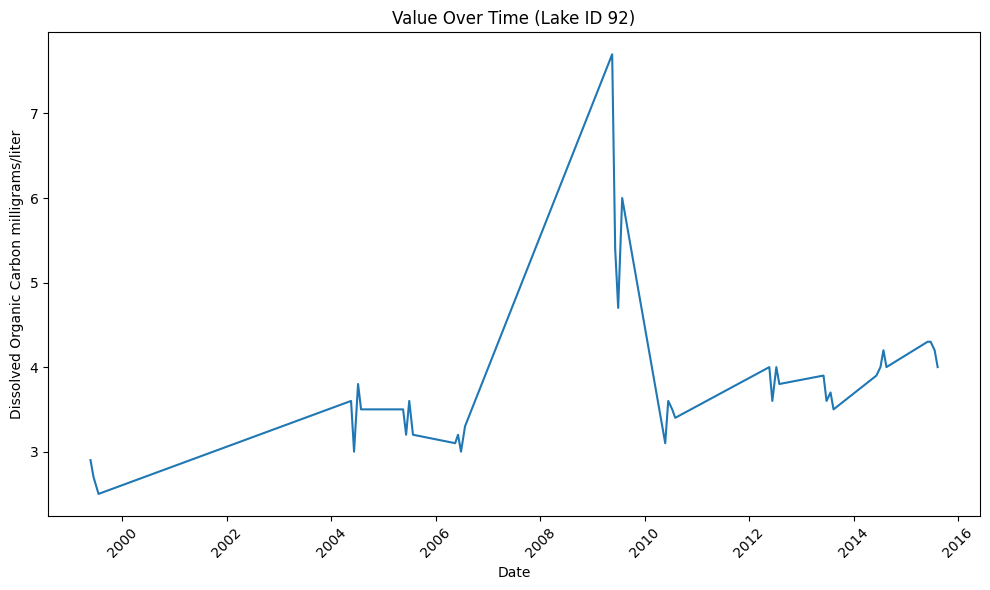

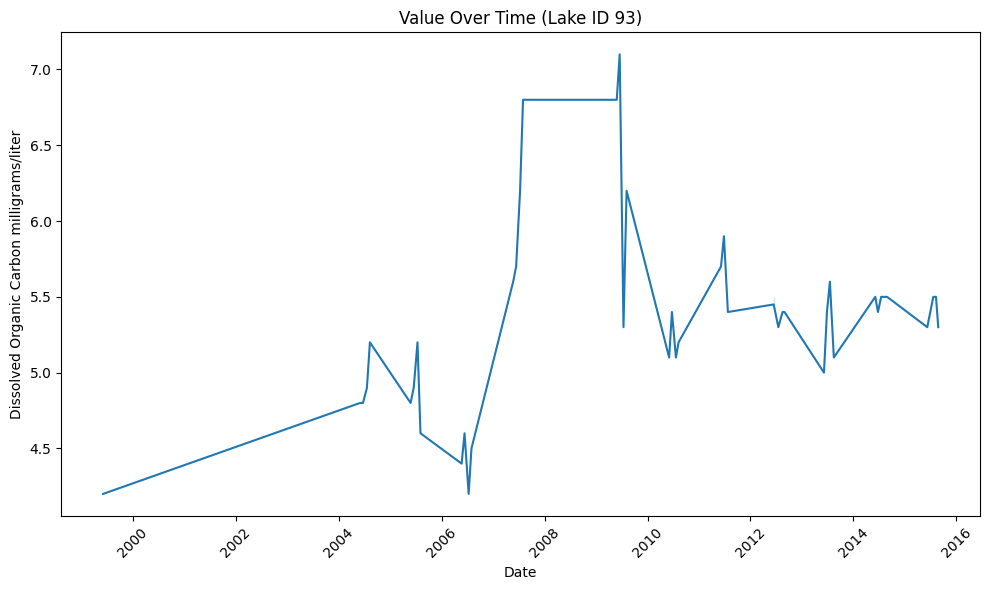

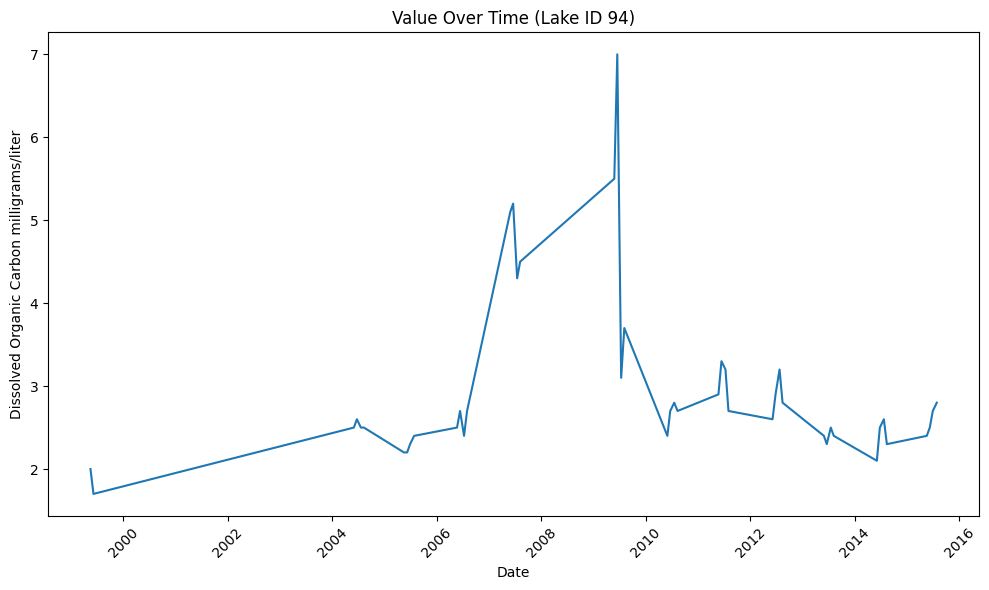

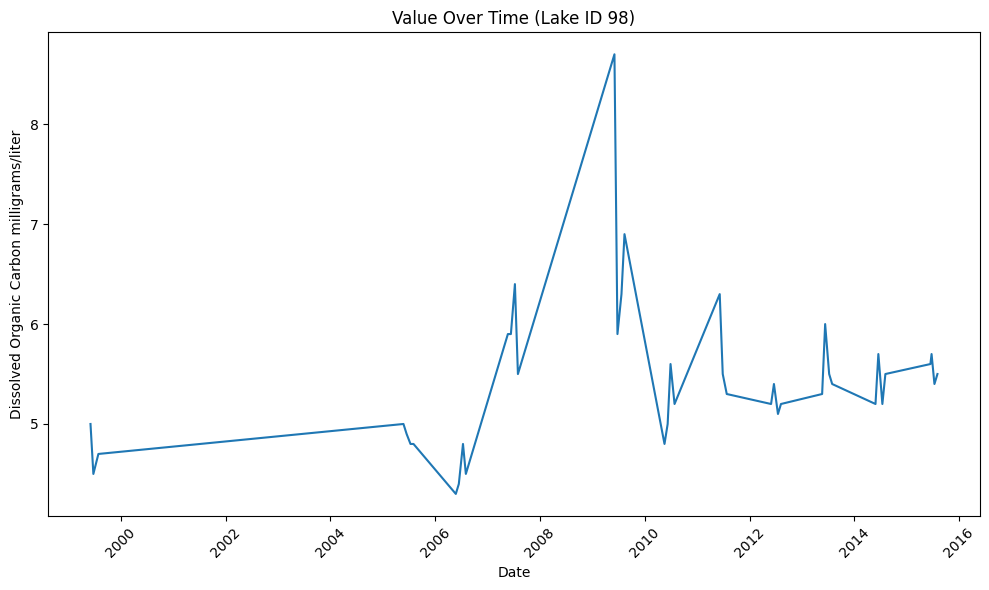

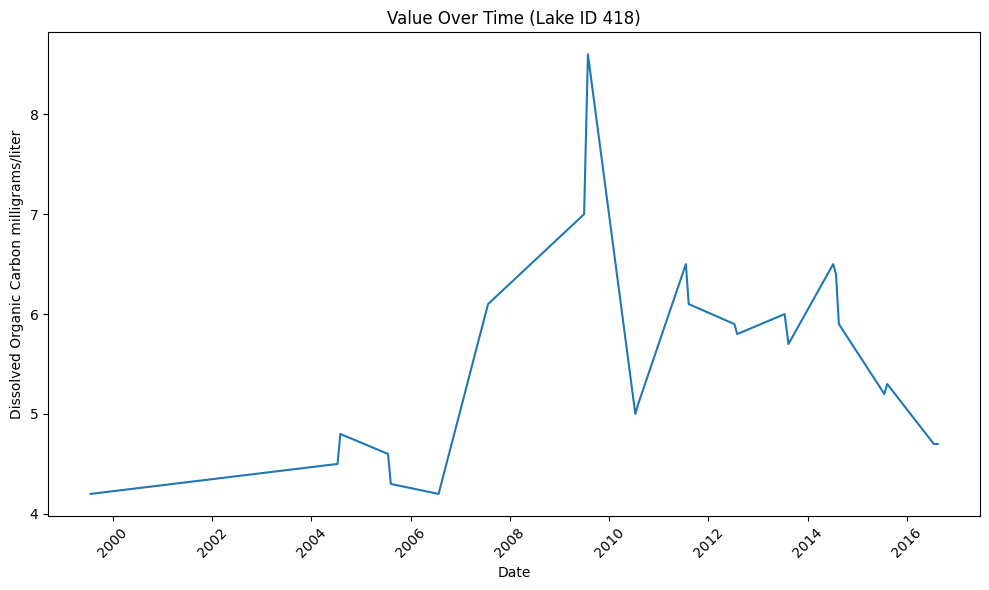

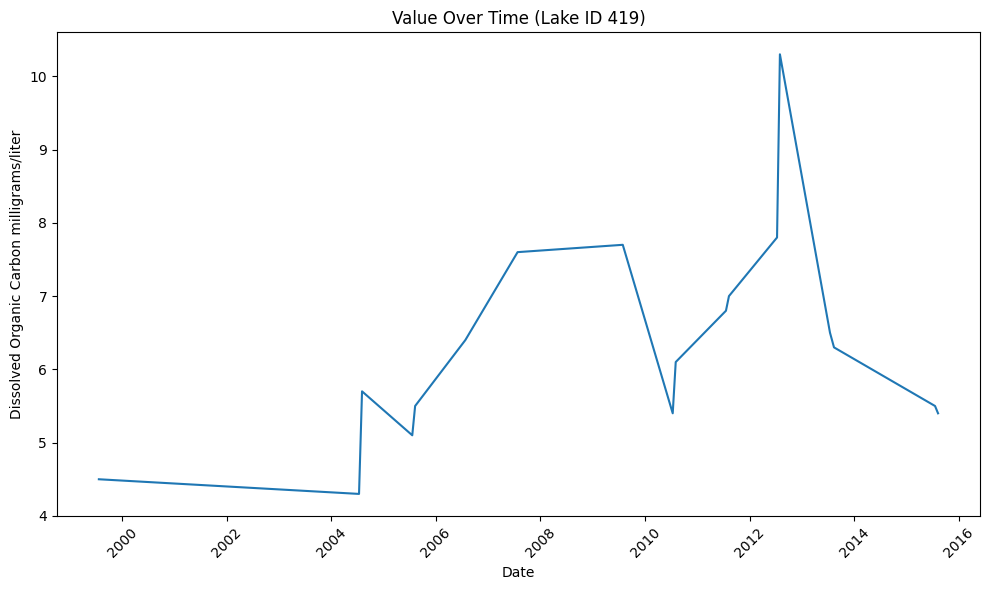

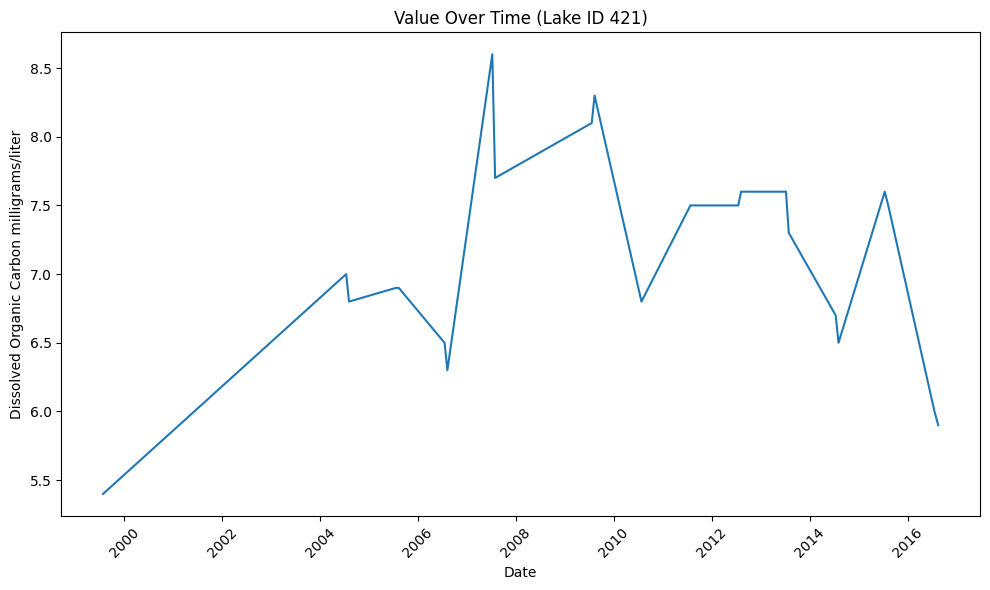

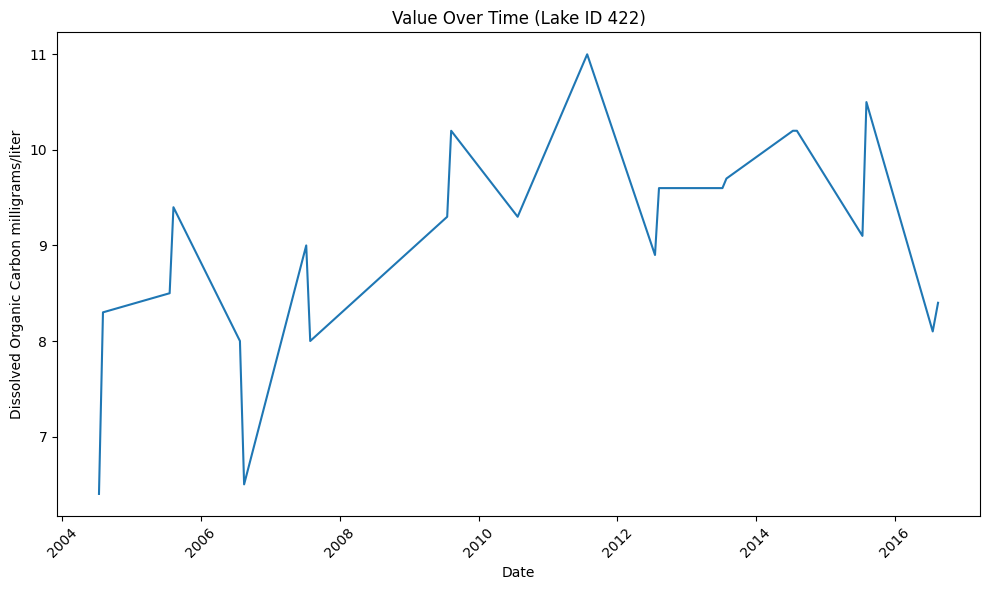

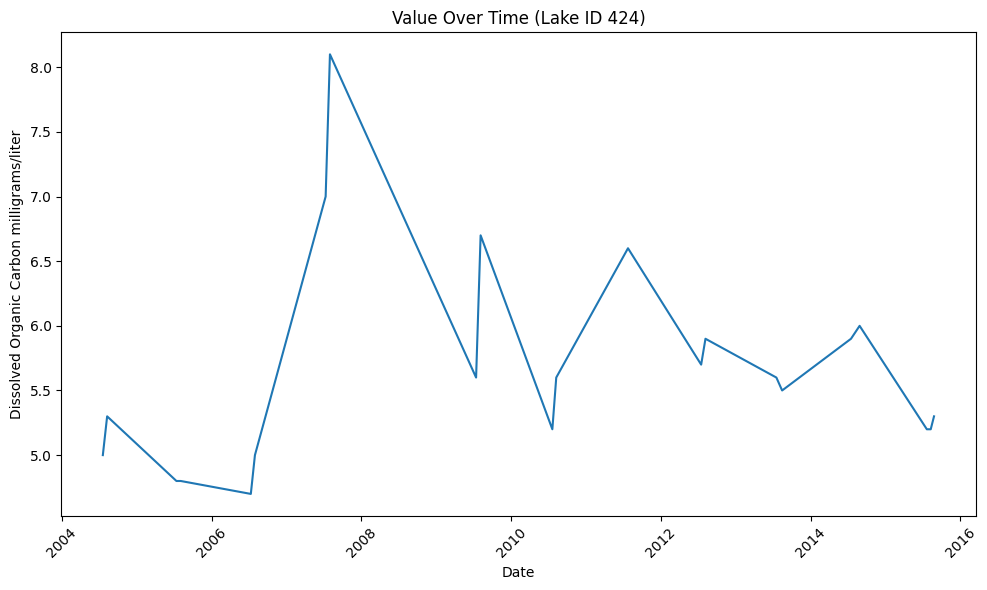

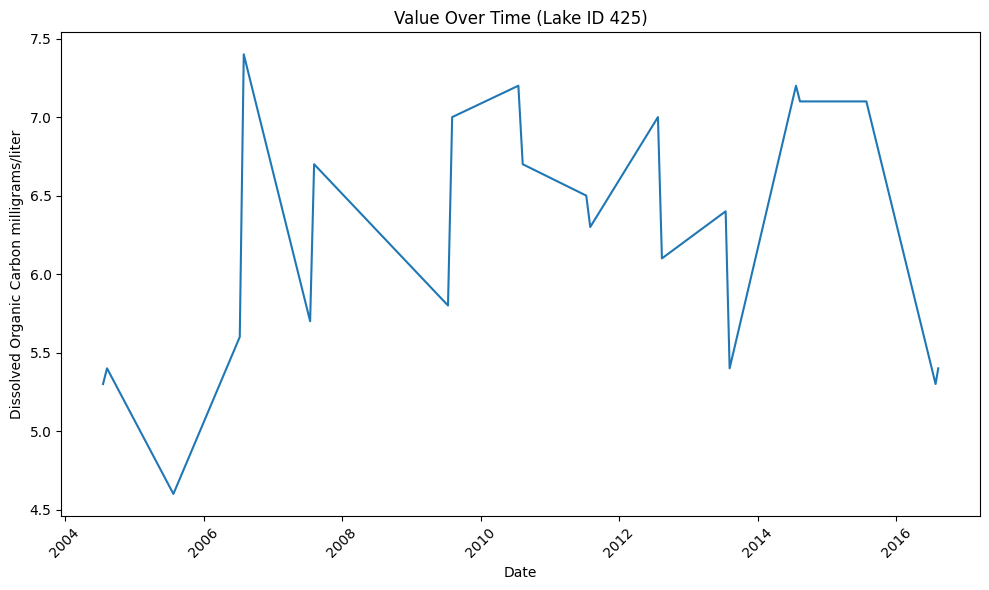

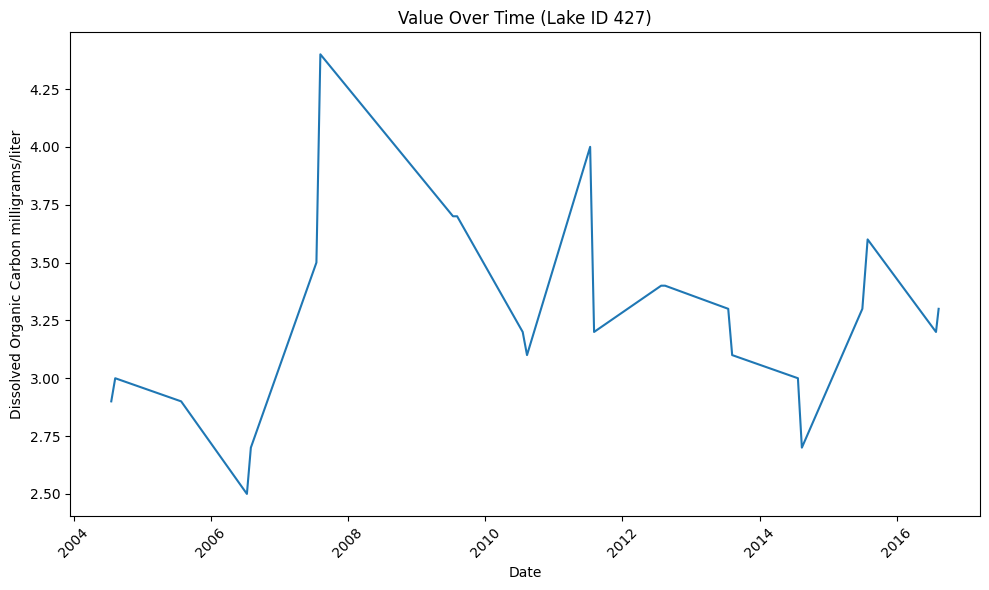

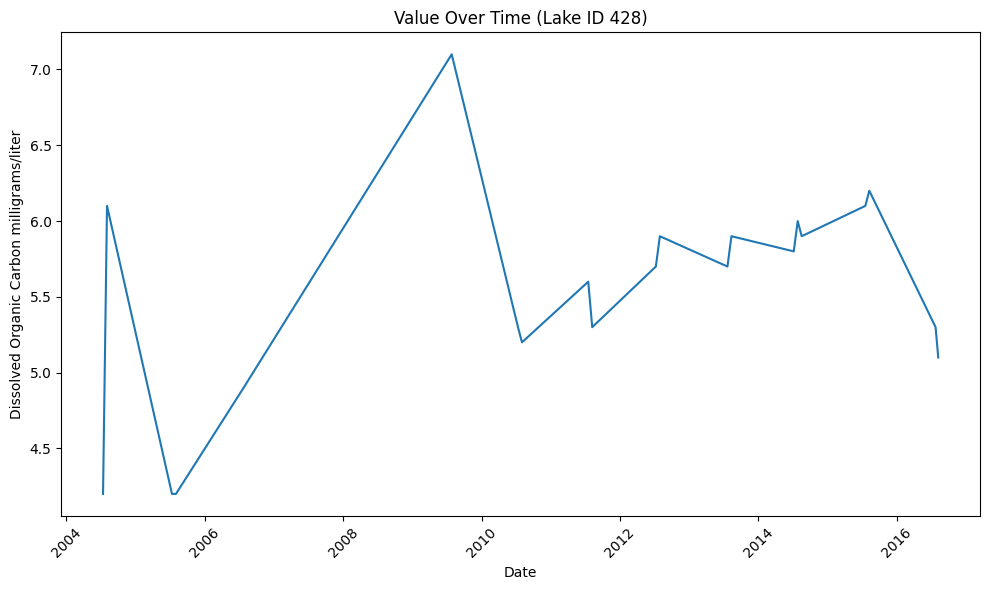

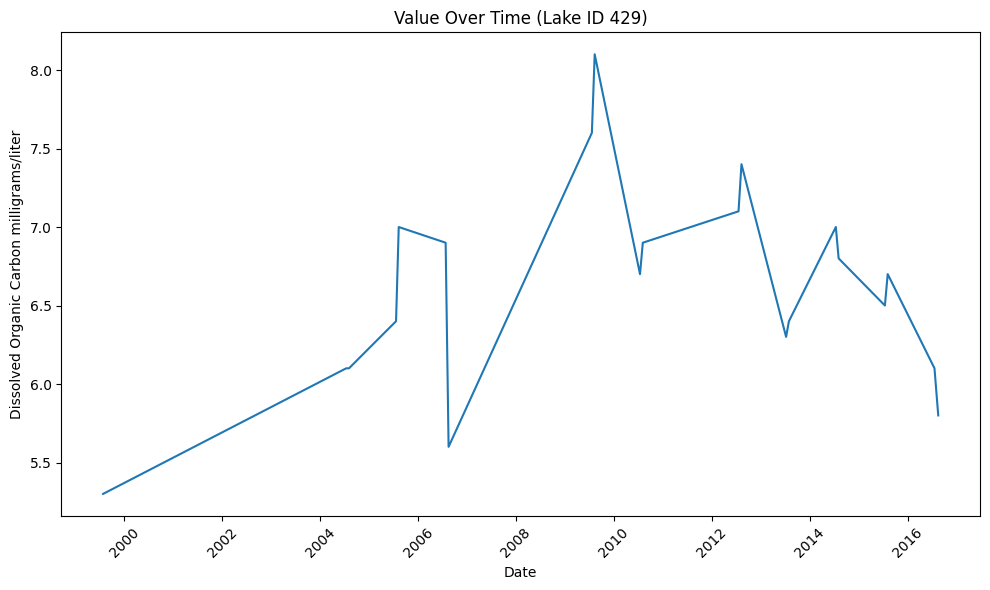

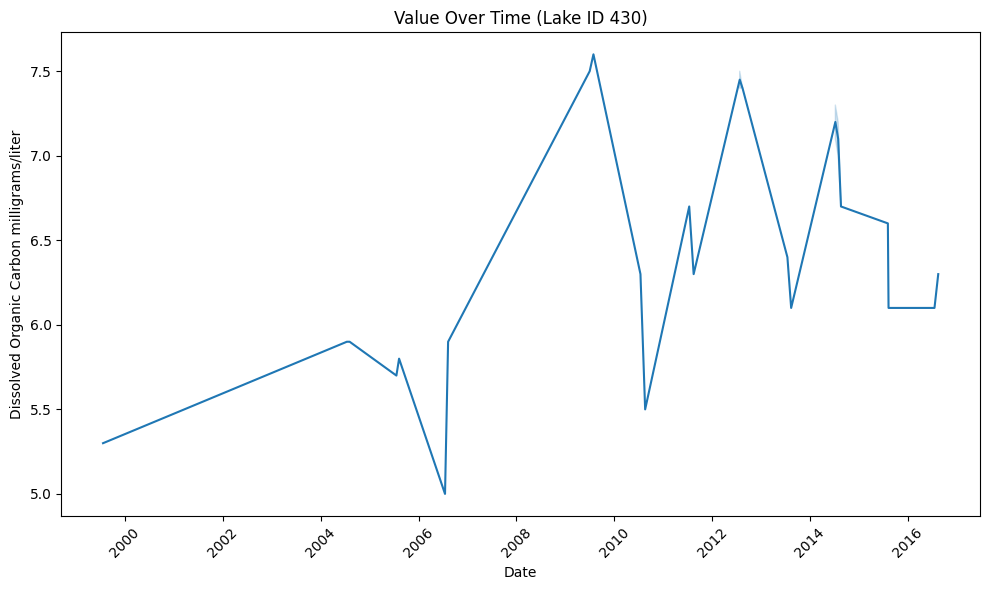

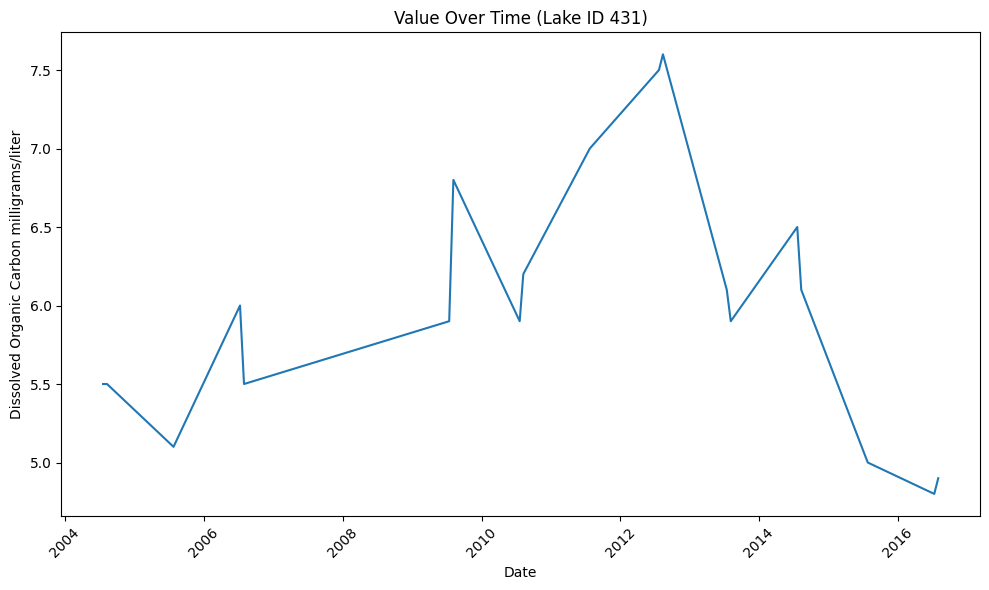

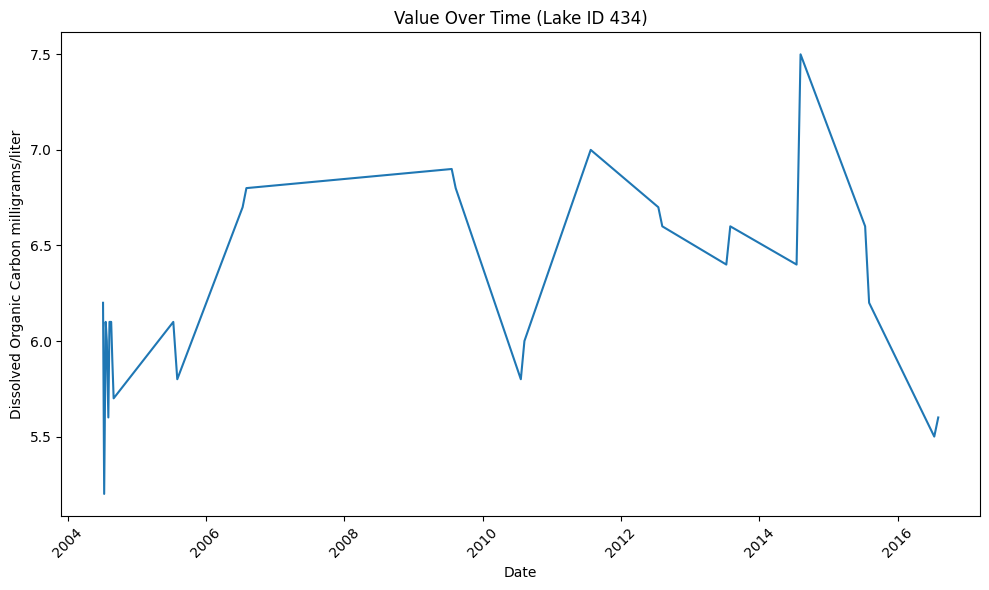

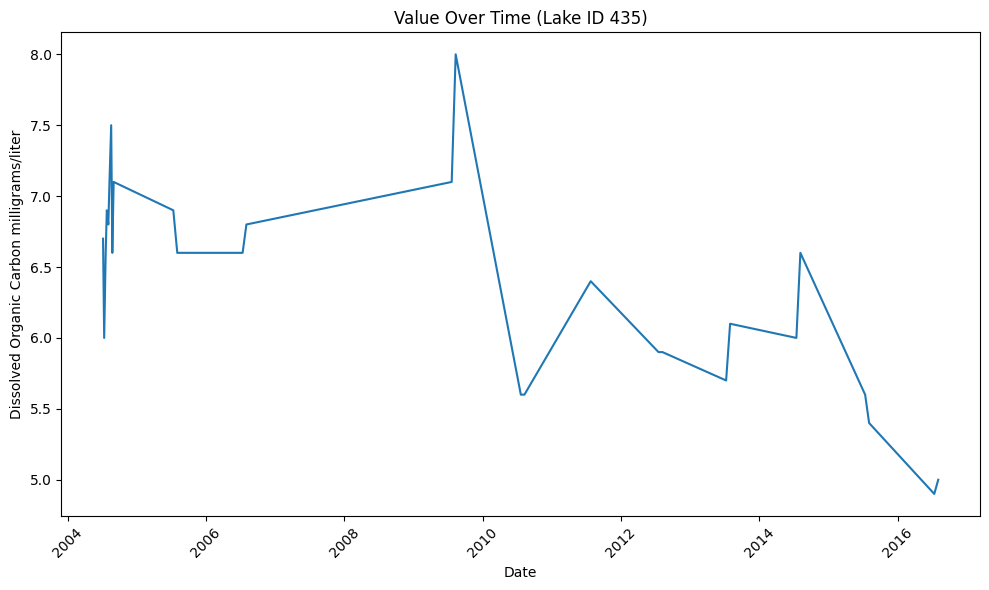

In [181]:
unique_lake_ids = df_cleaned['lake_id'].unique()

for lake_id in unique_lake_ids:
    # Filter data for current lake ID
    df_filtered = df_cleaned[df_cleaned['lake_id'] == lake_id]
    
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='date', y='doc_mgl', data=df_filtered)
    plt.title(f'Value Over Time (Lake ID {lake_id})')
    plt.xlabel('Date')
    plt.ylabel('Dissolved Organic Carbon milligrams/liter')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()